### <center>EDGE DETECTION OF IMAGES<center>

Edges define the boundaries between the different regions in an image which helps in matching the pattern,segment and recognize an object. In simple threshholding , the theshold value is global, which is prone to fail in m any cases. Adaptive thresholding is a modefied method wgere the threshold value is calculated for each pixel based on a smaller region around it. Therefore there are different threshold value for different regions.

### AIM:

#### Use different thresholding methods for edge detection and use that as a mask to give color to all the edges.

### STEPS:
- Using open cv converting an image to gray scale.
- Implementing Edge Detection using canny edge detection.
- Then applying Simple Thresholding.
- Then Adaptive /OTSU thresholding 
- After getting good results use the result as a mask to give a color to all edges.



### Importing libraries

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import cv2


### Loading and showing the Original  Image

In [66]:
org_img=cv2.imread("/kaggle/input/opencv-samples-images/minions.jpg")
print(org_img)# Displays the pixel values

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


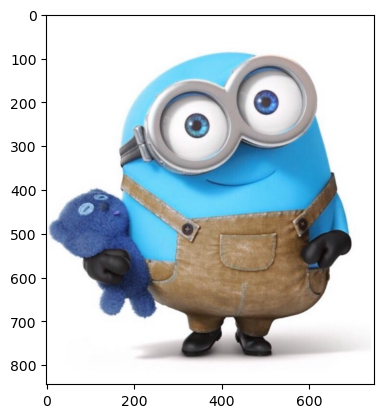

In [67]:
plt.imshow(org_img)# Open cv displays an image in BGR format

(844, 748, 3)


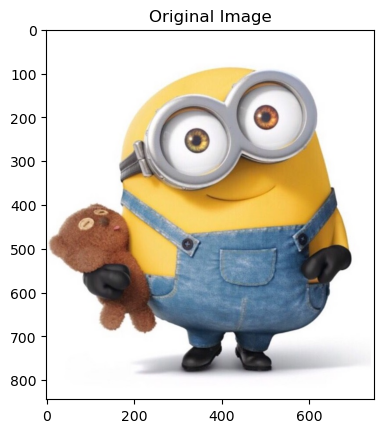

In [68]:
# Converting to RGB
orgc_img=cv2.cvtColor(org_img,cv2.COLOR_RGB2BGR)
print(orgc_img.shape)
plt.title("Original Image")
plt.imshow(orgc_img)

### <center> Converting to gray scale <center>

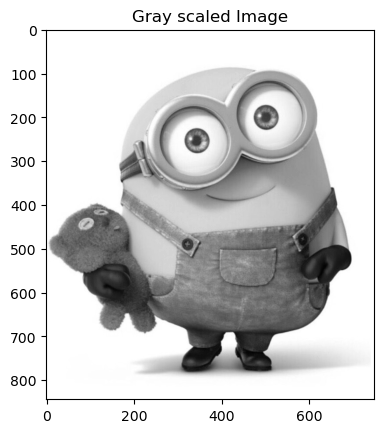

In [69]:
Gimg=cv2.imread("/kaggle/input/opencv-samples-images/minions.jpg",0)
plt.title("Gray scaled Image")
plt.imshow(Gimg,cmap='gray')


### <center> Edge Detection using canny <center>

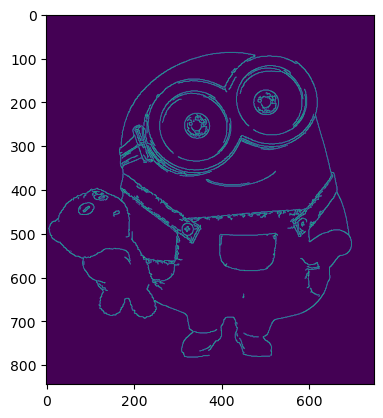

In [72]:
img_canny=cv2.Canny(org_img,100,200)
plt.imshow(img_canny)


### <center>Simple Thresholding<center>
* Thresholding is the simplest method of segmenting images

- cv2.THRESH_BINARY: If pixel intensity is greater than the set threshold, value set to 255, else set to 0 (black).
- cv2.THRESH_BINARY_INV: Inverted or Opposite case of cv2.THRESH_BINARY.
- cv.THRESH_TRUNC: If pixel intensity value is greater than threshold, it is truncated to the threshold. The pixel values are set to be the same as the threshold. All other values remain the same.
- cv.THRESH_TOZERO: Pixel intensity is set to 0, for all the pixels intensity, less than the threshold value.
- cv.THRESH_TOZERO_INV: Inverted or Opposite case of cv2.THRESH_TOZERO.    

### Thresh Binary

In [73]:
ret,thresh1=cv2.threshold(img_canny,127,255,cv2.THRESH_BINARY)
ret,thresh1

(127.0,
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8))

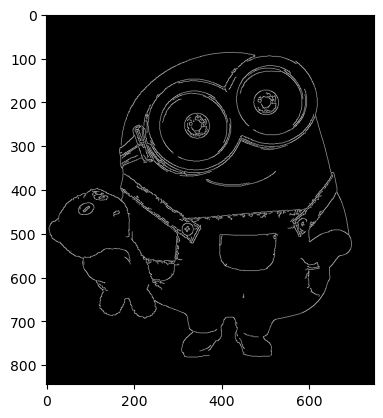

In [74]:
plt.imshow(thresh1,cmap='gray')

### THRESH BINARY INV


In [75]:
ret,thresh2=cv2.threshold(img_canny,127,255,cv2.THRESH_BINARY_INV)
ret,thresh2

(127.0,
 array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=uint8))

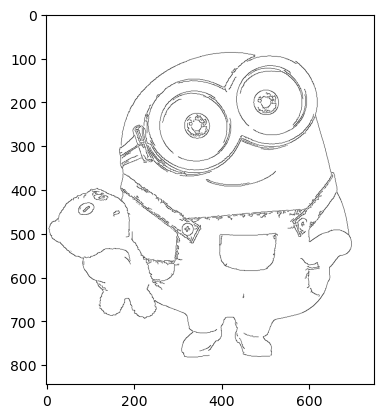

In [76]:
plt.imshow(thresh2,cmap='gray')

### THRESH TRUNC

In [77]:
ret,thresh3=cv2.threshold(img_canny,127,255,cv2.THRESH_TRUNC)
ret,thresh3

(127.0,
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8))

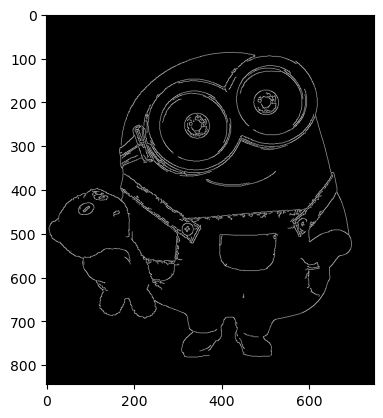

In [78]:
plt.imshow(thresh3,cmap='gray')

### THRESH_TOZERO

In [79]:
ret,thresh4=cv2.threshold(img_canny,127,255,cv2.THRESH_TOZERO)
ret,thresh4

(127.0,
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8))

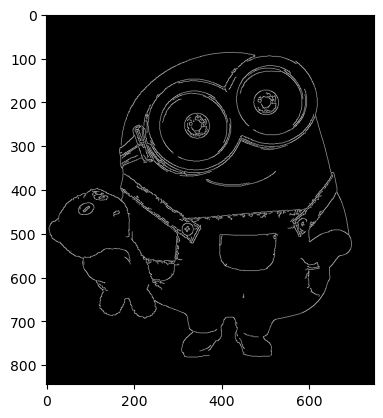

In [80]:
plt.imshow(thresh4,cmap='gray')

### Adaptive Thresholding

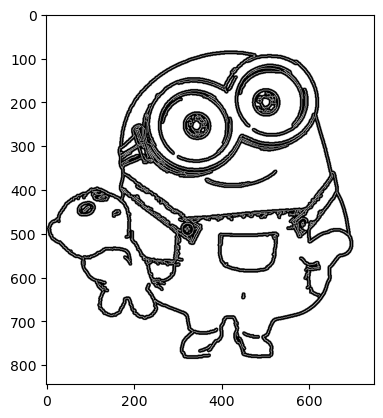

In [81]:
## threshold value is the mean of neighbourhood area
thresh6=cv2.adaptiveThreshold(img_canny,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,9,2)
plt.imshow(thresh6,cmap='gray')



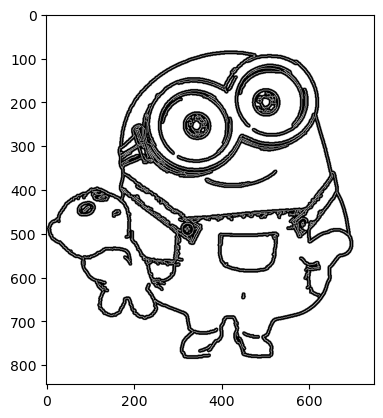

In [82]:
## threshold value is the weighted sum of neighbourhood values where weights are a gaussian window.
thresh7=cv2.adaptiveThreshold(img_canny,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,9,2)
plt.imshow(thresh7,cmap='gray')

### Color the edges

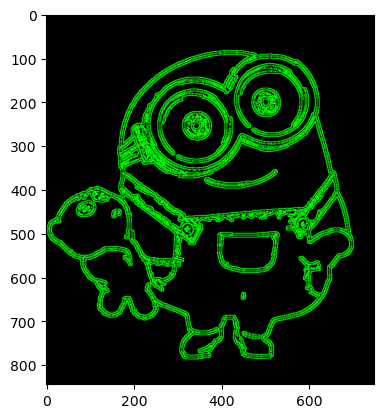

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import filters

# Calculate edges using a threshold
edges = filters.sobel(thresh7)

# Create an edge mask and set edge pixels to green [0, 255, 0]
edge_mask = np.zeros_like(org_img)
edge_mask[edges != 0] = [0, 255, 0]

# Display the edge mask
plt.imshow(edge_mask)
plt.show()
